In [1]:
from keras.layers import Input, Dense
from keras.models import Model

In [2]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

In [3]:
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img) #Undercomplete Encoding
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

In [4]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [5]:
from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train[:6000]
x_test = x_test[:1000]

#Converting into float & Scaling Data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


#Setting Up data from 28*28 to 784 for the width & height of image
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
#Fitting/training the model
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
47/47 [==============================] - 1s 13ms/step - loss: 0.5674 - accuracy: 0.0010 - val_loss: 0.4683 - val_accuracy: 0.0000e+00
Epoch 2/5
47/47 [==============================] - 0s 8ms/step - loss: 0.4279 - accuracy: 0.0032 - val_loss: 0.4014 - val_accuracy: 0.0080
Epoch 3/5
47/47 [==============================] - 0s 8ms/step - loss: 0.3833 - accuracy: 0.0075 - val_loss: 0.3720 - val_accuracy: 0.0100
Epoch 4/5
47/47 [==============================] - 0s 9ms/step - loss: 0.3591 - accuracy: 0.0077 - val_loss: 0.3551 - val_accuracy: 0.0090
Epoch 5/5
47/47 [==============================] - 0s 8ms/step - loss: 0.3458 - accuracy: 0.0078 - val_loss: 0.3446 - val_accuracy: 0.0130


In [7]:
#predicting on the test data
prediction = autoencoder.predict(x_test)

32/32 [==============================] - 0s 2ms/step


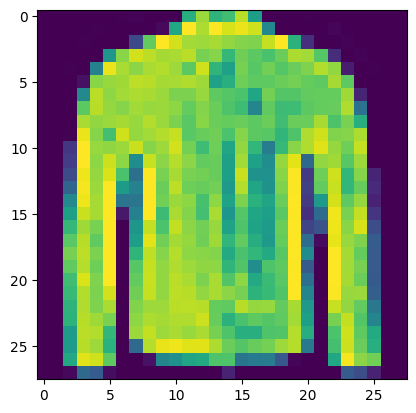

In [8]:
#Input Image
from matplotlib import pyplot as plt
plt.imshow(x_test[50].reshape(28,28))
plt.show()

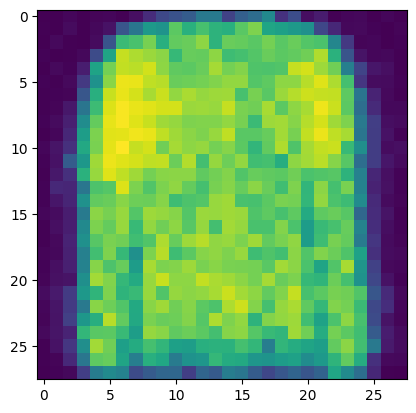

In [9]:
#reconstructed Image
from matplotlib import pyplot as plt
plt.imshow(prediction[50].reshape(28,28))
plt.show()

1) Add one more hidden layer to autoencoder

In [10]:
# this is our input placeholder
input_img = Input(shape=(784,))
#Adding hidden layer to encoding
hiddenLayer_en=Dense(512,activation='relu')(input_img)
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(hiddenLayer_en) #Undercomplete Encoding
#Adding hidden layer to decoding
hiddenLayer_de=Dense(512,activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(hiddenLayer_de)


# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])


from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#Converting into float & Scaling Data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#Setting Up data from 28*28 to 784 for the width & height of image
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#Fitting/training the model
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
469/469 [==============================] - 14s 27ms/step - loss: 0.3238 - accuracy: 0.0137 - val_loss: 0.2929 - val_accuracy: 0.0166
Epoch 2/5
469/469 [==============================] - 12s 25ms/step - loss: 0.2865 - accuracy: 0.0213 - val_loss: 0.2847 - val_accuracy: 0.0211
Epoch 3/5
469/469 [==============================] - 11s 24ms/step - loss: 0.2807 - accuracy: 0.0249 - val_loss: 0.2812 - val_accuracy: 0.0250
Epoch 4/5
469/469 [==============================] - 12s 25ms/step - loss: 0.2778 - accuracy: 0.0285 - val_loss: 0.2785 - val_accuracy: 0.0275
Epoch 5/5
469/469 [==============================] - 13s 28ms/step - loss: 0.2754 - accuracy: 0.0321 - val_loss: 0.2771 - val_accuracy: 0.0326


2) Do the prediction on the test data and then visualize the reconstructed version of that test data. Also visualize, the same test data before reconstruction using matplotlib

In [11]:
#predicting on the test data
prediction = autoencoder.predict(x_test)

313/313 [==============================] - 4s 12ms/step


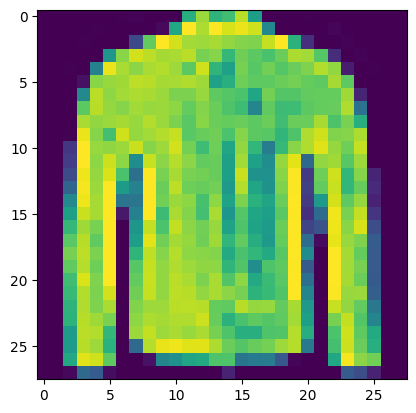

In [12]:
#Input Image
from matplotlib import pyplot as plt
plt.imshow(x_test[50].reshape(28,28))
plt.show()

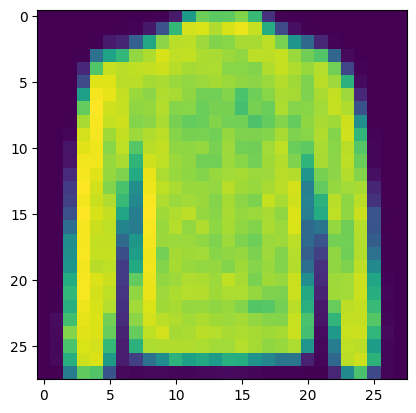

In [13]:
#reconstructed Image
from matplotlib import pyplot as plt
plt.imshow(prediction[50].reshape(28,28))
plt.show()

3) Repeat the question 2 on the denoisening autoencoder 2

In [14]:
from keras.layers import Input, Dense
from keras.models import Model

In [15]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

In [16]:
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img) #Undercomplete Encoding
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

In [17]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train[:6000]
x_test = x_test[:1000]

#Converting into float & Scaling Data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


#Setting Up data from 28*28 to 784 for the width & height of image
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [20]:
#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [21]:
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

Epoch 1/10
24/24 [==============================] - 1s 20ms/step - loss: 0.6416 - accuracy: 0.0012 - val_loss: 0.5546 - val_accuracy: 0.0020
Epoch 2/10
24/24 [==============================] - 0s 13ms/step - loss: 0.5046 - accuracy: 0.0020 - val_loss: 0.4592 - val_accuracy: 0.0050
Epoch 3/10
24/24 [==============================] - 0s 19ms/step - loss: 0.4331 - accuracy: 0.0015 - val_loss: 0.4110 - val_accuracy: 0.0030
Epoch 4/10
24/24 [==============================] - 1s 24ms/step - loss: 0.4019 - accuracy: 0.0048 - val_loss: 0.3927 - val_accuracy: 0.0040
Epoch 5/10
24/24 [==============================] - 1s 34ms/step - loss: 0.3870 - accuracy: 0.0058 - val_loss: 0.3800 - val_accuracy: 0.0040
Epoch 6/10
24/24 [==============================] - 1s 28ms/step - loss: 0.3757 - accuracy: 0.0088 - val_loss: 0.3693 - val_accuracy: 0.0040
Epoch 7/10
24/24 [==============================] - 1s 33ms/step - loss: 0.3664 - accuracy: 0.0095 - val_loss: 0.3605 - val_accuracy: 0.0030
Epoch 8/10
24

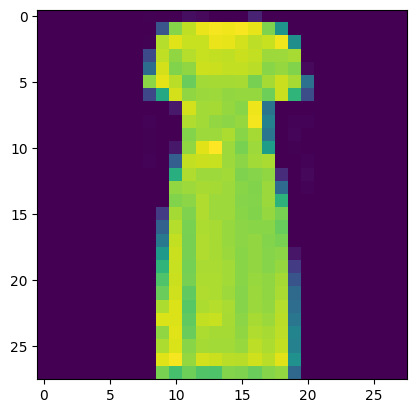

In [22]:
#Before applying Noise to data
from matplotlib import pyplot as plt
plt.imshow(x_train[50].reshape(28,28))
plt.show()

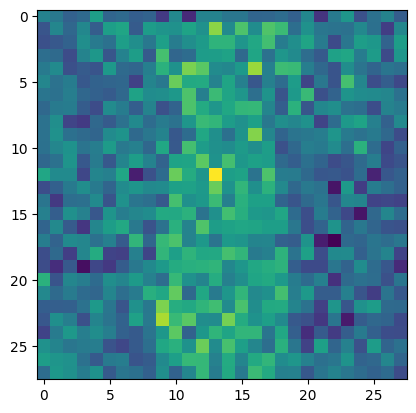

In [23]:
#After Applying Noise to data
from matplotlib import pyplot as plt
plt.imshow(x_train_noisy[50].reshape(28,28))
plt.show()

In [24]:
#predicting on the test data
prediction = autoencoder.predict(x_test_noisy) #prediction

32/32 [==============================] - 0s 2ms/step


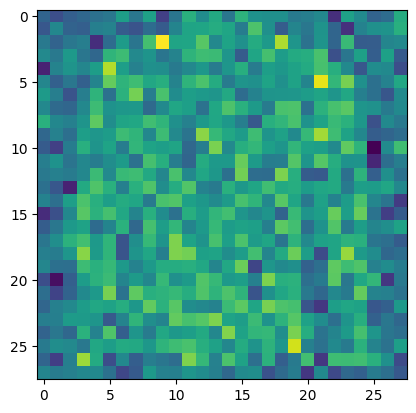

In [25]:
#Input Image After Noise to be predicted
from matplotlib import pyplot as plt
plt.imshow(x_test_noisy[50].reshape(28,28))
plt.show()

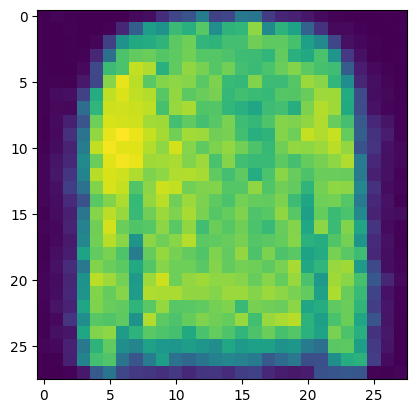

In [26]:
#reconstructed Image
from matplotlib import pyplot as plt
plt.imshow(prediction[50].reshape(28,28))
plt.show()

4) Plot loss and accuracy using the history object

In [27]:
autoencoder.metrics_names

['loss', 'accuracy']

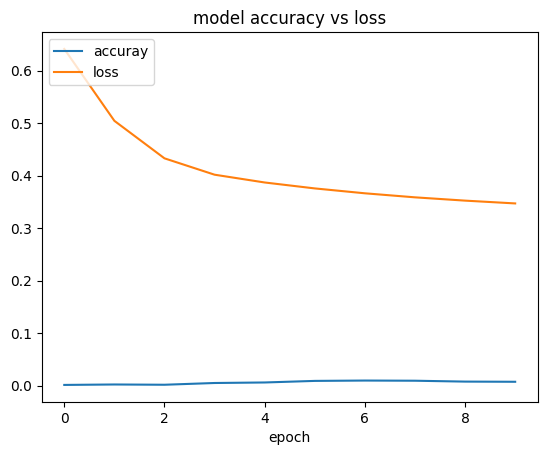

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy vs loss')
plt.xlabel('epoch')
plt.legend(['accuray','loss'], loc='upper left')
plt.show()